In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Jul 11 13:22 .
drwxr-xr-x 1 root root 4096 Jul 14 19:05 ..
drwxr-xr-x 4 root root 4096 Jul 11 13:21 .config
drwxr-xr-x 1 root root 4096 Jul 11 13:22 sample_data


In [2]:
!curl -IL https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel.duckdb

HTTP/1.1 200 OK
x-amz-id-2: mDfSL3EMf/4OJ5k20yxCgN8UFGIpvHMJ6sIhI5imd95+HuXReMavsWbDNQ3mxiFti85LaQA3DdWcVkQHUGmtN1sRB6dTpqlz
x-amz-request-id: Z45MKM14WCM0YD87
Date: Sun, 14 Jul 2024 19:05:53 GMT
Last-Modified: Thu, 11 Jul 2024 02:11:32 GMT
ETag: "1c075464ee93e86f6a715d4cd22f4084-167"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: binary/octet-stream
Server: AmazonS3
Content-Length: 1396453376



In [3]:
!time wget --no-clobber https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel.duckdb

--2024-07-14 19:05:56--  https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel.duckdb
Resolving 3253-machine-learning.s3.ca-central-1.amazonaws.com (3253-machine-learning.s3.ca-central-1.amazonaws.com)... 3.5.254.255, 3.5.252.63, 52.95.190.106, ...
Connecting to 3253-machine-learning.s3.ca-central-1.amazonaws.com (3253-machine-learning.s3.ca-central-1.amazonaws.com)|3.5.254.255|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1396453376 (1.3G) [binary/octet-stream]
Saving to: ‘lit_panel.duckdb’

lit_panel.duckdb    100%[===================>]   1.30G  85.9MB/s    in 14s     

2024-07-14 19:06:10 (92.4 MB/s) - ‘lit_panel.duckdb’ saved [1396453376/1396453376]


real	0m14.737s
user	0m1.192s
sys	0m4.385s


In [4]:
import duckdb

conn = duckdb.connect('lit_panel.duckdb')
df = conn.sql('SELECT count(*) as tota_count FROM lit_panel').df()
df.head()

,tota_count
0,15863500


In [60]:
# List of columns to drop (all columns ending with 'Fn')
columns_to_drop = [col for col in df.columns if col.endswith('Fn')]

# Drop these features too
columns_to_drop.extend(['type', 'URL', 'dateOfFilingDateChange', 'issuerCIK',
                        'periodOfReport', 'dateOfOriginalSubmission', 'transactionDate',
                        'deemedExecutionDate', 'transactionFormType', 'valueOwnedFollowingTransaction',
                        'transactionTotalValue', 'exerciseDate', 'expirationDate',
                        'underlyingSecurityTitle', 'underlyingSecurityShares', 'underlyingSecurityValue'])

In [61]:
# Drop these columns from the DataFrame
df_edited = df.drop(columns=columns_to_drop)

In [62]:
df_edited.columns

Index(['acceptanceDatetime', 'accessionNumber', 'period', 'filingDate',
       'documentType', 'notSubjectToSection16', 'issuerTradingSymbol',
       'm_isDirector', 'm_isOfficer', 'm_isTenPercentOwner', 'm_isOther',
       'transactionType', 'tableRow', 'securityTitle', 'transactionCode',
       'equitySwapInvolved', 'transactionTimeliness', 'transactionShares',
       'transactionPricePerShare', 'transactionAcquiredDisposedCode',
       'sharesOwnedFollowingTransaction', 'directOrIndirectOwnership',
       'natureOfOwnership', 'conversionOrExercisePrice'],
      dtype='object')

In [63]:
df_edited.describe()

,acceptanceDatetime,period,filingDate,m_isDirector,m_isOfficer,m_isTenPercentOwner,m_isOther,tableRow
count,6.000000e+01,60.0,60.0,60.0,60.0,60.0,60.0,60.000000
mean,2.004112e+13,20041115.0,20041117.0,0.0,0.0,1.0,0.0,15.500000
std,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,8.728484
min,2.004112e+13,20041115.0,20041117.0,0.0,0.0,1.0,0.0,1.000000
25%,2.004112e+13,20041115.0,20041117.0,0.0,0.0,1.0,0.0,8.000000
50%,2.004112e+13,20041115.0,20041117.0,0.0,0.0,1.0,0.0,15.500000
75%,2.004112e+13,20041115.0,20041117.0,0.0,0.0,1.0,0.0,23.000000
max,2.004112e+13,20041115.0,20041117.0,0.0,0.0,1.0,0.0,30.000000


In [75]:
# Facebook (FB rebranded as META)
q = "select * from lit_panel where issuerTradingSymbol IN ('FB', 'META')"
df_META = conn.sql(q).df()
df_META_edited = df_META.drop(columns=columns_to_drop)
df_META_edited

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,acceptanceDatetime,accessionNumber,period,filingDate,documentType,notSubjectToSection16,issuerTradingSymbol,m_isDirector,m_isOfficer,m_isTenPercentOwner,...,transactionCode,equitySwapInvolved,transactionTimeliness,transactionShares,transactionPricePerShare,transactionAcquiredDisposedCode,sharesOwnedFollowingTransaction,directOrIndirectOwnership,natureOfOwnership,conversionOrExercisePrice
0,20120517162130,0001209191-12-028890,20120517,20120517,3,None,FB,1,0,0,...,None,None,None,None,None,None,None,None,None,None
1,20120517180213,0001209191-12-029018,20120517,20120517,4,0,FB,1,0,0,...,A,0,None,1000000,0.00,A,1000000,D,None,None
2,20120517162233,0001209191-12-028891,20120517,20120517,3,None,FB,1,0,0,...,None,None,None,None,None,None,None,D,None,None
3,20120517175848,0001209191-12-029015,20120517,20120517,4,0,FB,1,0,0,...,A,1,None,5247490,0.00,A,5247490,D,None,None
4,20120517161654,0001209191-12-028882,20120517,20120517,3,None,FB,1,0,0,...,None,None,None,None,None,None,None,I,"By Andreessen Horowitz Fund II, L.P., as nominee",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24758,20240703193413,0000950103-24-009663,20240703,20240703,4,0,META,1,1,1,...,None,None,None,None,None,None,244782799,I,"By CZI Holdings, LLC",None
24759,20240703193413,0000950103-24-009663,20240703,20240703,4,0,META,1,1,1,...,None,None,None,None,None,None,3388197,I,"By Mark Zuckerberg, Trustee Of The Mark Zucker...",None
24760,20240703193413,0000950103-24-009663,20240703,20240703,4,0,META,1,1,1,...,None,None,None,None,None,None,34344500,I,"By Chan Zuckerberg Holdings, LLC",None
24761,20240703193413,0000950103-24-009663,20240703,20240703,4,0,META,1,1,1,...,None,None,None,None,None,None,12000000,I,"By CZI Holdings I, LLC",None


In [76]:
df_META_edited.columns

Index(['acceptanceDatetime', 'accessionNumber', 'period', 'filingDate',
       'documentType', 'notSubjectToSection16', 'issuerTradingSymbol',
       'm_isDirector', 'm_isOfficer', 'm_isTenPercentOwner', 'm_isOther',
       'transactionType', 'tableRow', 'securityTitle', 'transactionCode',
       'equitySwapInvolved', 'transactionTimeliness', 'transactionShares',
       'transactionPricePerShare', 'transactionAcquiredDisposedCode',
       'sharesOwnedFollowingTransaction', 'directOrIndirectOwnership',
       'natureOfOwnership', 'conversionOrExercisePrice'],
      dtype='object')

In [77]:
# Import libraries
import pandas as pd
import numpy as np

In [80]:
# Cleanse Data
# Replace None values with np.nan (Not a Number) and convert to numeric type
df_META_edited['transactionPricePerShare'] = pd.to_numeric(df_META_edited['transactionPricePerShare'].replace([None], np.nan), errors='coerce')
df_META_edited['transactionShares'] = pd.to_numeric(df_META_edited['transactionShares'], errors='coerce').fillna(np.nan)
df_META_edited['sharesOwnedFollowingTransaction'] = pd.to_numeric(df_META_edited['sharesOwnedFollowingTransaction'].replace([None], np.nan), errors='coerce')
df_META_edited['directOrIndirectOwnership'] = df_META_edited['directOrIndirectOwnership'].replace({None: np.nan})

# Transaction types
valid_transaction_types = ['nonDerivativeTransaction', 'derivativeTransaction', 'nonDerivativeHolding', 'derivativeHolding']
invalid_transaction_types_count = len(df_META_edited[~df_META_edited['transactionType'].isin(valid_transaction_types)])
print(f'Number of invalid transaction types: {invalid_transaction_types_count}')

# Filter the DataFrame to only include valid transaction types
df_META_edited = df_META_edited.loc[df_META_edited['transactionType'].isin(valid_transaction_types)]

# Clean up 'documentType' by removing '/A' and ensuring it's numeric
df_META_edited.loc[:, 'documentType'] = df_META_edited['documentType'].str.replace(r'/A$', '', regex=True)
df_META_edited.loc[:, 'documentType'] = pd.to_numeric(df_META_edited['documentType'], errors='coerce')




Number of invalid transaction types: 12


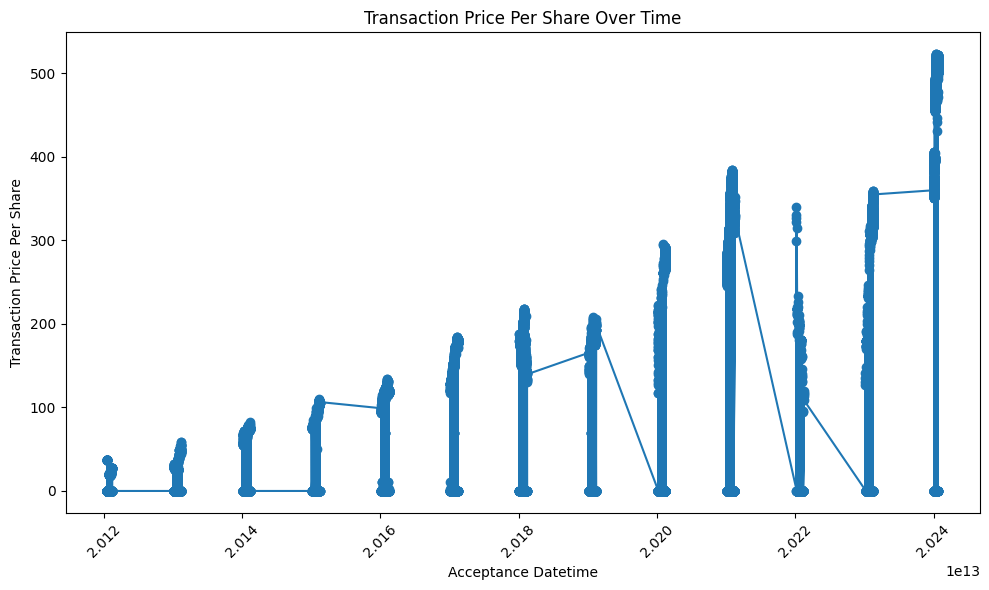

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_META_edited['acceptanceDatetime'], df_META_edited['transactionPricePerShare'], marker='o', linestyle='-')
plt.title('Transaction Price Per Share Over Time')
plt.xlabel('Acceptance Datetime')
plt.ylabel('Transaction Price Per Share')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Code for downloading a DF to CSV

# from google.colab import files

# # Convert DataFrame to CSV
# df_META_edited.to_csv('df_META_edited.csv', index=False)  # Avoid saving the index as a column

# # Trigger a browser download
# files.download('df_META_edited.csv')